In [24]:
import pandas as pd

import pandas_profiling as pp

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt

import numpy as np

import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn import linear_model
import lightgbm as lgb

In [25]:
#ładowanie danych z pliku płaskiego o rozszeżeniu csv
#df = pd.read_csv("repo/data/SolarPredictionNew.csv")
df = pd.read_csv('repo/data/RadiationTimeSeriesPrediction/SolarPrediction.csv')
df = df[["NatezeniePromieniowania", "Temperatura", "CisnieniePowietrza", "WilgotnoscPowietrza", "PredkoscWiatru"]]
#wybór interesujących nas trybutów z załadowanego pliku z danymi
#df = df[["data","dlugoscdnia","natezeniesloneczne","temperatura","cisnieniepowietrza","wilgotnosc","predkoscwiatru"]]


In [26]:
df.head(20)

,NatezeniePromieniowania,Temperatura,CisnieniePowietrza,WilgotnoscPowietrza,PredkoscWiatru
0,1.21,48,30.46,59,5.62
1,1.21,48,30.46,58,3.37
2,1.23,48,30.46,57,3.37
3,1.21,48,30.46,60,3.37
4,1.17,48,30.46,62,5.62
5,1.21,48,30.46,64,5.62
6,1.20,49,30.46,72,6.75
7,1.24,49,30.46,71,5.62
8,1.23,49,30.46,80,4.50
9,1.21,49,30.46,85,4.50


In [27]:
df.dtypes

NatezeniePromieniowania    float64
Temperatura                  int64
CisnieniePowietrza         float64
WilgotnoscPowietrza          int64
PredkoscWiatru             float64
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 5 columns):
NatezeniePromieniowania    32686 non-null float64
Temperatura                32686 non-null int64
CisnieniePowietrza         32686 non-null float64
WilgotnoscPowietrza        32686 non-null int64
PredkoscWiatru             32686 non-null float64
dtypes: float64(3), int64(2)
memory usage: 1.2 MB


In [29]:
df.describe()

,NatezeniePromieniowania,Temperatura,CisnieniePowietrza,WilgotnoscPowietrza,PredkoscWiatru
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,6.243869
std,315.916387,6.201157,0.054673,25.990219,3.490474
min,1.110000,34.000000,30.190000,8.000000,0.000000
25%,1.230000,46.000000,30.400000,56.000000,3.370000
50%,2.660000,50.000000,30.430000,85.000000,5.620000
75%,354.235000,55.000000,30.460000,97.000000,7.870000
max,1601.260000,71.000000,30.560000,103.000000,40.500000


In [30]:
nulls_summary = pd.DataFrame(df.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((df.isnull().mean()*100),2)
print(nulls_summary)

                         Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
NatezeniePromieniowania  False                   0               0.0
Temperatura              False                   0               0.0
CisnieniePowietrza       False                   0               0.0
WilgotnoscPowietrza      False                   0               0.0
PredkoscWiatru           False                   0               0.0


In [31]:
df.skew() 

NatezeniePromieniowania    1.369681
Temperatura                0.522103
CisnieniePowietrza        -1.226962
WilgotnoscPowietrza       -0.776280
PredkoscWiatru             1.469814
dtype: float64

NatezeniePromieniowania     (6271.096426256924, 0.0)
CisnieniePowietrza          (6813.834079418886, 0.0)
PredkoscWiatru             (11028.362526267148, 0.0)
dtype: object

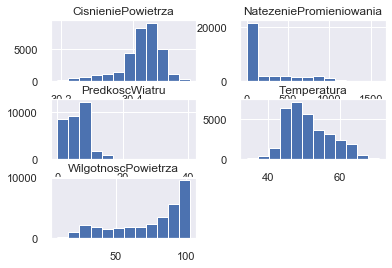

In [32]:
from scipy import stats
df.hist(bins=12) # histogram dla wszystkich zmiennych
df.select_dtypes([float, int]).apply(stats.normaltest)# test na normalność rozkładu

In [33]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)


In [34]:
num_of_outliers_L = (df[iqr.index] < low_boundary).sum()
num_of_outliers_U = (df[iqr.index] > upp_boundary).sum()


In [35]:
outliers = pd.DataFrame('low_boundary', 'upp_boundary','num_of_outliers_L', 'num_of_outliers_U')
print(outliers) 

TypeError: data type 'num_of_outliers_U' not understood

In [36]:
#histogram po Radiation
df[""].hist()

KeyError: ''

In [37]:
# Aby znaleźć korelację między 
#kolumnami za pomocą metody Pearsona 
df.corr(method ='pearson')

,NatezeniePromieniowania,Temperatura,CisnieniePowietrza,WilgotnoscPowietrza,PredkoscWiatru
NatezeniePromieniowania,1.000000,0.734955,0.119016,-0.226171,0.073627
Temperatura,0.734955,1.000000,0.311173,-0.285055,-0.031458
CisnieniePowietrza,0.119016,0.311173,1.000000,-0.223973,-0.083639
WilgotnoscPowietrza,-0.226171,-0.285055,-0.223973,1.000000,-0.211624
PredkoscWiatru,0.073627,-0.031458,-0.083639,-0.211624,1.000000


In [38]:
 np.corrcoef(df.select_dtypes(['float']), rowvar=0) 

array([[ 1.        ,  0.11901566,  0.07362687],
       [ 0.11901566,  1.        , -0.08363929],
       [ 0.07362687, -0.08363929,  1.        ]])

In [39]:
#df['Humidity'].astype(float)
stats.spearmanr(df.select_dtypes(['float', 'int']))[0]

array([[ 1.        ,  0.04557749, -0.02106594],
       [ 0.04557749,  1.        ,  0.0299068 ],
       [-0.02106594,  0.0299068 ,  1.        ]])

In [40]:
# To find the correlation among 
# the columns using kendall method 
df.corr(method ='kendall') 

,NatezeniePromieniowania,Temperatura,CisnieniePowietrza,WilgotnoscPowietrza,PredkoscWiatru
NatezeniePromieniowania,1.000000,0.538313,0.031905,-0.084600,-0.015171
Temperatura,0.538313,1.000000,0.199718,-0.151589,-0.052562
CisnieniePowietrza,0.031905,0.199718,1.000000,-0.150526,0.021822
WilgotnoscPowietrza,-0.084600,-0.151589,-0.150526,1.000000,-0.156442
PredkoscWiatru,-0.015171,-0.052562,0.021822,-0.156442,1.000000


In [41]:
df.corr(method ='spearman')

,NatezeniePromieniowania,Temperatura,CisnieniePowietrza,WilgotnoscPowietrza,PredkoscWiatru
NatezeniePromieniowania,1.000000,0.717746,0.045577,-0.117571,-0.021066
Temperatura,0.717746,1.000000,0.279273,-0.212946,-0.074065
CisnieniePowietrza,0.045577,0.279273,1.000000,-0.216916,0.029907
WilgotnoscPowietrza,-0.117571,-0.212946,-0.216916,1.000000,-0.218425
PredkoscWiatru,-0.021066,-0.074065,0.029907,-0.218425,1.000000


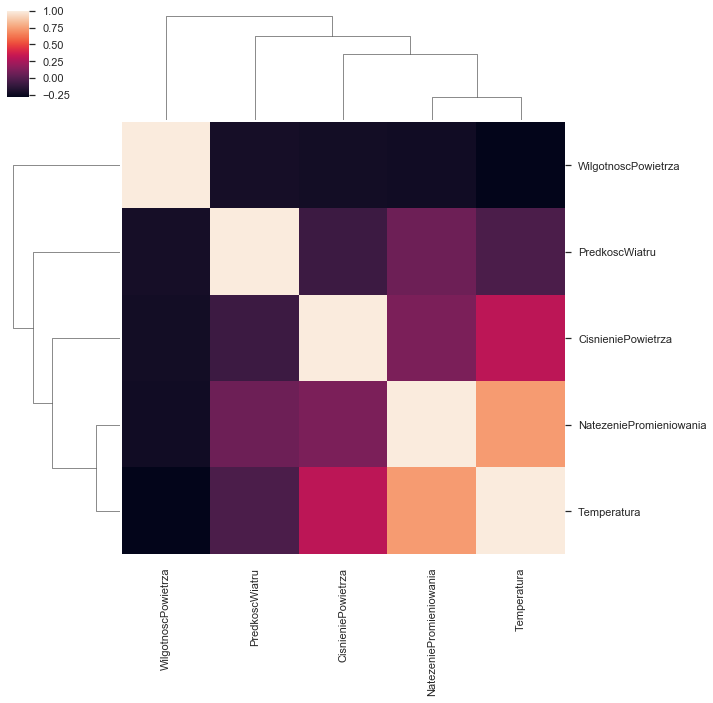

In [42]:
sns.clustermap(df.corr());

In [111]:
# To find the correlation among 
# the columns using kendall method 
df.corr(method ='kendall') 

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
Radiation,1.000000,0.538313,0.031905,-0.084600,-0.205663,-0.015171
Temperature,0.538313,1.000000,0.199718,-0.151589,-0.269547,-0.052562
Pressure,0.031905,0.199718,1.000000,-0.150526,-0.105480,0.021822
Humidity,-0.084600,-0.151589,-0.150526,1.000000,-0.041277,-0.156442
WindDirection(Degrees),-0.205663,-0.269547,-0.105480,-0.041277,1.000000,0.060362
Speed,-0.015171,-0.052562,0.021822,-0.156442,0.060362,1.000000


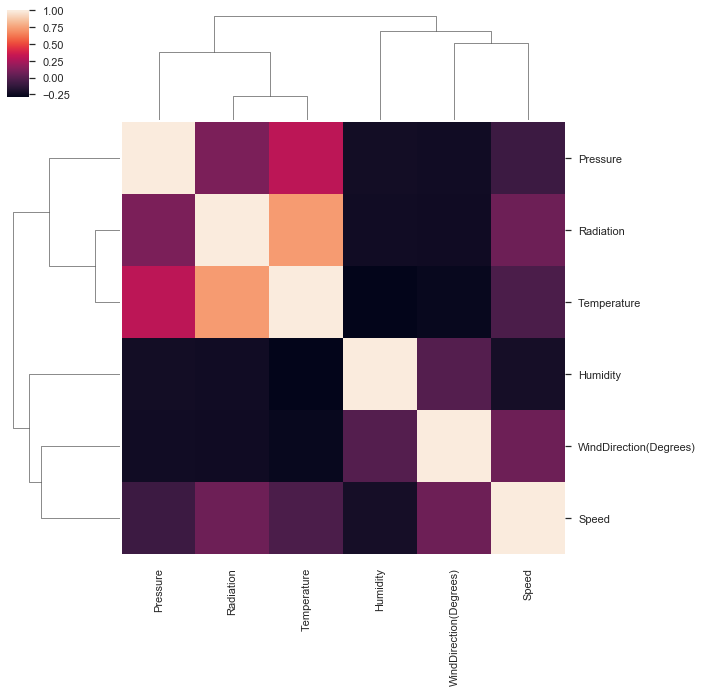

In [112]:
sns.clustermap(df.corr());

In [113]:
#Regression task
X = df.drop("Radiation", axis=1)
#sprawdzic dla pojedynczych argumentow
Y = df["Radiation"]

In [11]:
# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=12)

In [12]:
len(X), len(X_train), len(Y_test)

(32686, 24514, 8172)

In [13]:
#constant model
Y_pred_const = np.full(Y_test.shape, Y_train.mean())
Y_pred_const[:5]

array([208.12715061, 208.12715061, 208.12715061, 208.12715061,
       208.12715061])

In [14]:
np.sqrt(mean_squared_error(Y_test, Y_pred_const))

314.16051873026726

In [15]:
r2_score(Y_test, Y_pred_const)
print(Y_pred_const[:10])

[208.12715061 208.12715061 208.12715061 208.12715061 208.12715061
 208.12715061 208.12715061 208.12715061 208.12715061 208.12715061]


In [16]:
def plot_predictions(Y_true, Y_predicted):
    df_pred = pd.DataFrame({"true": Y_true, "predicted": Y_predicted})
    val_min = 0
    val_max = 1000
    figure = sns.jointplot('true', 'predicted', df_pred,
                           xlim=(val_min, val_max),
                           ylim=(val_min, val_max))
    figure.ax_joint.plot([val_min, val_max], [val_min, val_max], ':k') 
    figure.fig.set_figheight(8)
    figure.fig.set_figwidth(8)

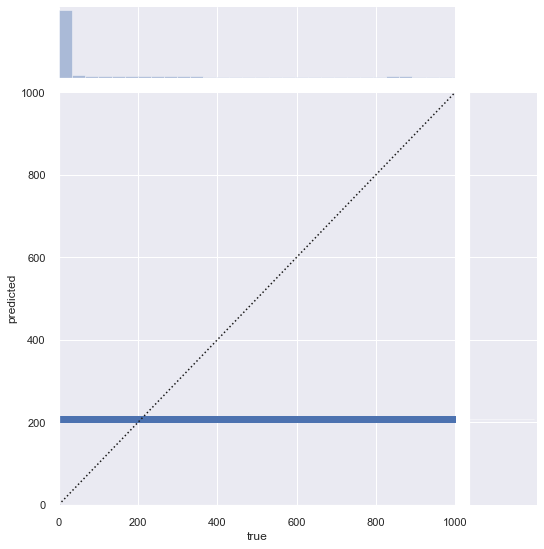

In [17]:
plot_predictions(Y_test, Y_pred_const)

In [18]:
#linear regression mode
#processing
X_train_lr = X_train.copy()
X_test_lr  = X_test.copy()

In [19]:
X_train_lr["Temperature"] = np.log10(X_train_lr["Temperature"])
X_test_lr["Temperature"]  = np.log10(X_test_lr["Temperature"])

#X_train_lr["Pressure"] = [np.log10(value) if value > 0 else 0 for value in X_train_lr["Pressure"]]
#X_test_lr["Pressure"]  = [np.log10(value) if value > 0 else 0 for value in X_test_lr["Pressure"]]

#X_train_lr["Pressure"] = np.log10(X_train_lr["Pressure"])
#X_test_lr["Pressure"]  = np.log10(X_test_lr["Pressure"])


In [35]:
columns = X_train_lr.columns

#regresja dla 2 zmiennych temp radiacja



Index(['UNIXTime', 'Data', 'Time', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'TimeSunRise', 'TimeSunSet'],
      dtype='object')


MemoryError: 

In [32]:
#training
reg = Ridge(random_state=12)

In [33]:
reg.fit(X_train_lr, Y_train)

ValueError: could not convert string to float: '11/28/2016 12:00:00 AM'